# 作業目標:
利用手寫辨識MNIST資料說明MLP (Multi Layer Perceptron)多層感知器中, 神經網路層的多寡跟預測結果的差異
### 手寫數字的MNIST數據庫: 數據集包含10個數字的60,000個28x28灰度圖像，以及10,000個圖像的測試集。

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
# Sequential: 單輸入, 單輸出
from keras.models import Sequential
from keras.layers import Dense

In [61]:
#宣告採用序列模型
model = Sequential()

In [62]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [63]:
model.add(Dense(128, activation='relu', kernel_initializer='normal'))

In [64]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [65]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [66]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [67]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2564 - accuracy: 0.9253 - val_loss: 0.1182 - val_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0999 - accuracy: 0.9689 - val_loss: 0.1138 - val_accuracy: 0.9654
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0632 - accuracy: 0.9802 - val_loss: 0.0980 - val_accuracy: 0.9717
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0726 - val_accuracy: 0.9795
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0846 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0958 - val_accuracy:

# 以圖形顯示訓練過程

In [68]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

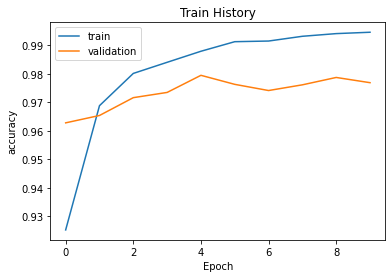

In [69]:
show_train_history(train_history,'accuracy','val_accuracy')

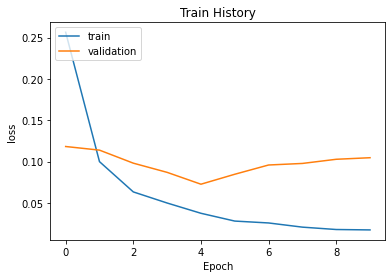

In [70]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [71]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1005 - accuracy: 0.9750

accuracy= 0.9750000238418579


#### 觀察結果: 多新增一層Dense層, 預測結果反而下降